In [1]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

72.97668751161831 -136.0989616424419
-88.66948594447113 -55.261042430145636
-65.33170823822529 19.33368965210019
20.669350652272257 174.354724452166
71.17763864792644 -104.22639643474722
65.26463819802476 -118.93722223945272
76.86247014152138 -6.567344658277108
24.00853550894921 58.88586496013616
20.93493272375187 -1.6136154586823466
-59.61604258275527 -20.978876830674835
-60.94059339110388 -10.236545341900097
12.670641741971636 -4.213863588318844
71.68932538305668 131.9086766731794
-11.800061912841315 133.65565760466137
62.25159335885371 -26.992527040462676
78.41363155013732 10.104150080153914
-29.634735503714424 43.31717910465227
49.23780750940227 -168.44831991790423
12.296340835526124 79.09339421942661
-10.68143318749425 173.13457416890344
-86.3531134416797 73.4852170647589
-39.86643018060508 104.22119225928583
68.71878354512074 54.767854862528736
-74.20079421031576 -61.62507253865229
-64.06138122838533 63.52521286490608
83.82378079501129 163.58354936943346
32.74231596282071 63.5513

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

tuktoyaktuk ca
ushuaia ar
bredasdorp za
butaritari ki
yellowknife ca
yellowknife ca
klaksvik fo
muscat om
tessalit ml
cidreira br
cape town za
toma bf
tiksi ru
maningrida au
olafsvik is
barentsburg sj
beloha mg
bethel us
tiruvannamalai in
lolua tv
taolanaro mg
busselton au
iskateley ru
ushuaia ar
taolanaro mg
cherskiy ru
taywarah af
khirkiya in
belushya guba ru
mahebourg mu
kodiak us
mataura pf
suluq ly
hilo us
hobart au
klaksvik fo
mar del plata ar
mahebourg mu
ushuaia ar
vardo no
castro cl
kapaa us
dikson ru
vaini to
iquique cl
teya ru
pandan ph
mataura pf
sabha ly
rikitea pf
banmo mm
new norfolk au
aklavik ca
ribeira grande pt
mrirt ma
nachingwea tz
itaituba br
albany au
illoqqortoormiut gl
kazalinsk kz
illoqqortoormiut gl
taolanaro mg
bredasdorp za
belushya guba ru
rikitea pf
luderitz na
clute us
saskylakh ru
dingle ie
ushuaia ar
lompoc us
yefira gr
rikitea pf
sandnessjoen no
lebu cl
qaanaaq gl
hobart au
baykit ru
makakilo city us
mian channun pk
ponta do sol cv
ushuaia ar
goundam 

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)


In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | muscat
Processing Record 8 of Set 1 | tessalit
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | toma
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | maningrida
Processing Record 14 of Set 1 | olafsvik
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | beloha
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | tiruvannamalai
Processing Record 19 of Set 1 | lolua
City not found. Skipping...
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | busselt

In [14]:
# Print the city count to confirm sufficient count.
len(cities)

628

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,57.20,94,75,4.61,CA,2022-07-19 13:45:23
1,Ushuaia,-54.8000,-68.3000,37.06,87,100,4.61,AR,2022-07-19 13:45:23
2,Bredasdorp,-34.5322,20.0403,54.57,78,98,4.47,ZA,2022-07-19 13:45:23
3,Butaritari,3.0707,172.7902,81.88,77,18,16.24,KI,2022-07-19 13:45:24
4,Yellowknife,62.4560,-114.3525,63.12,82,75,4.61,CA,2022-07-19 13:45:24
5,Klaksvik,62.2266,-6.5890,52.72,98,100,11.27,FO,2022-07-19 13:45:24
6,Muscat,23.6139,58.5922,87.82,77,37,9.46,OM,2022-07-19 13:45:25
7,Tessalit,20.1986,1.0114,98.65,24,95,8.41,ML,2022-07-19 13:45:25
8,Cidreira,-30.1811,-50.2056,59.99,80,68,4.74,BR,2022-07-19 13:45:25
9,Cape Town,-33.9258,18.4232,60.12,65,20,14.97,ZA,2022-07-19 13:43:20


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-07-19 13:45:23,69.4541,-133.0374,57.20,94,75,4.61
1,Ushuaia,AR,2022-07-19 13:45:23,-54.8000,-68.3000,37.06,87,100,4.61
2,Bredasdorp,ZA,2022-07-19 13:45:23,-34.5322,20.0403,54.57,78,98,4.47
3,Butaritari,KI,2022-07-19 13:45:24,3.0707,172.7902,81.88,77,18,16.24
4,Yellowknife,CA,2022-07-19 13:45:24,62.4560,-114.3525,63.12,82,75,4.61
...,...,...,...,...,...,...,...,...,...
570,Yazman,PK,2022-07-19 14:00:16,29.1212,71.7446,101.52,40,13,9.64
571,Myitkyina,MM,2022-07-19 14:00:17,25.3833,97.4000,74.62,100,100,1.88
572,Ustyuzhna,RU,2022-07-19 14:00:17,58.8394,36.4321,64.76,52,84,12.12
573,Alyangula,AU,2022-07-19 14:00:17,-13.8483,136.4192,67.66,83,40,7.65


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

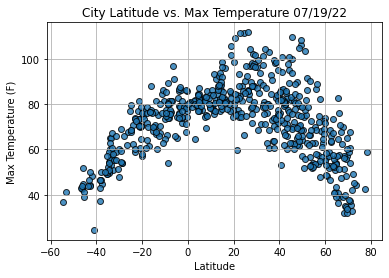

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

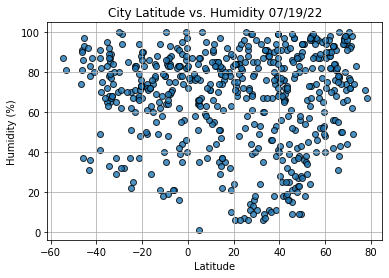

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

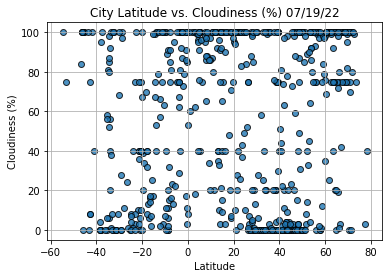

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

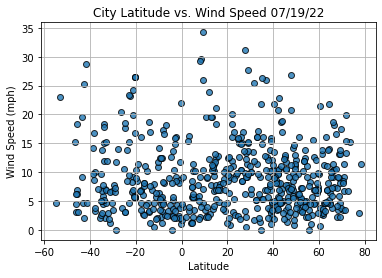

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                     Olafsvik
Country                        IS
Date          2022-07-19 13:45:27
Lat                       64.8945
Lng                      -23.7142
Max Temp                    53.87
Humidity                       68
Cloudiness                    100
Wind Speed                    6.4
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
570     True
571     True
572     True
573    False
574    False
Name: Lat, Length: 575, dtype: bool

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-07-19 13:45:23,69.4541,-133.0374,57.20,94,75,4.61
3,Butaritari,KI,2022-07-19 13:45:24,3.0707,172.7902,81.88,77,18,16.24
4,Yellowknife,CA,2022-07-19 13:45:24,62.4560,-114.3525,63.12,82,75,4.61
5,Klaksvik,FO,2022-07-19 13:45:24,62.2266,-6.5890,52.72,98,100,11.27
6,Muscat,OM,2022-07-19 13:45:25,23.6139,58.5922,87.82,77,37,9.46


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

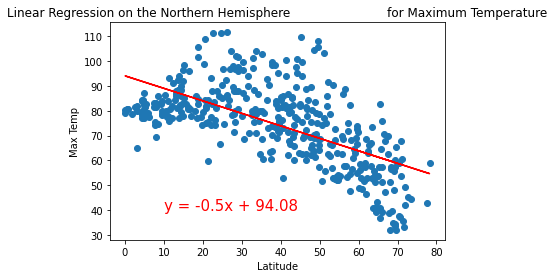

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

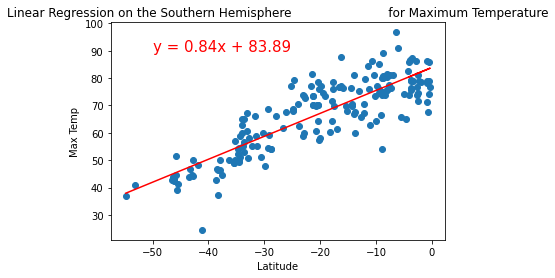

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))